# Regression

The linear problems we have learned so far are all balanced or square system, in which the number of equations equals the number of unknowns. However, in the real cases, overdetermined linear systems are much more common: we almost always take more measurements than the unknowns in order to reduce the effect of noises. How can we solve a overdetermined system?

## Linear Least Square Regression

Consider an overdetermined linear system $A x = b$, where $A$ is a $n \times m$ rectangular matrix, where $n > m$. We also require $A$ to be full rank. Due to the error in the measurement $b$, in most cases there are no $x$ existing that fully satisfies all the equations in the system. 

To solve the problem, we need to find a $x$ that minimize the error between the model prediction ($Ax$) and measurement ($b$), which can be presented by a column vector as:
$$ e = Ax - b $$

The most common way to solve $x$ is to minimize L-2 norm of the error vector $e$, which is defined as:
$$
E = \sum_{i=1}^{m} e_i^2 = e^T e
$$
where $e^T$ is the transpose of $e$. 

By substituting $e = Ax-b$, we have
$$
E = e^Te = (Ax-b)^T(Ax-b) = x^TA^TAx - b^TAx - x^TA^Tb + b^Tb = x^TA^TAx - 2x^TA^Tb + b^Tb
$$
To find $x$ that minimizes $E$, we set the derivatives of $E$ with respect to $x$ to zero:
$$
\frac{\partial E}{\partial x} = -2 A^Tb + 2A^T A x = 0
$$
which gives us one of the **normal equations**:
$$
A^T A x = A^T b \\
A^\dagger x=b^\dagger
$$
This brings us back the problem we have learned in the last section, where $A^\dagger = A^TA$ is a full-rank square matrix, $b^\dagger = A^T b$ is a column vector. 

### Exercise
By knowing the following matrix differentiation rules, please prove the normal equations. 
$$
\alpha = A x  \ \ \ \Longrightarrow \ \ \ 
\frac{\partial \alpha}{\partial x} = A
$$
$$
\alpha = x^T A  \ \ \ \Longrightarrow \ \ \ 
\frac{\partial \alpha}{\partial x} = A^T
$$
$$
\alpha = x^T A x  \ \ \ \Longrightarrow \ \ \ 
\frac{\partial \alpha}{\partial x} = x^T \left(A + A^T \right)
$$
The proof of the matrix differentiation rules can be found [here](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf).

## 1-D Linear Regression: Fitting a Straight Line

Two variables $\alpha$ and $\beta$ that we know are linearly related, which can be presented as
$$
\beta = c_1 \alpha + c_0
$$
where $a$ and $b$ are the unknown constant to be determined. By taking a series of measurements, we have $n$ data points $(\alpha_1,\beta_1), (\alpha_2,\beta_2),..., (\alpha_n,\beta_n)$. The goal is to find the optimized $a$ and $b$ such that the error
$$
\varepsilon^2 = \sum_{i=1}^{n} \left( c_1\alpha_i + c_0 - \beta_i \right)^2
$$
is minimized.

This problem is equivalent to the least-square problem we just discussed, if we rewrite the problem in the matrix form as:
$$
e = 
\left[
\begin{matrix}
\alpha_1 & 1 \\
\alpha_2 & 1 \\
\vdots & \vdots \\
\alpha_n & 1 
\end{matrix}
\right]
\left[
\begin{matrix}
c_1 \\
c_0
\end{matrix}
\right]
- 
\left[
\begin{matrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n \\
\end{matrix}
\right]
$$
and by minimizing $e^Te$ we have
$$
A^T A x = A^T b
$$
where
$$
A = 
\left[
\begin{matrix}
\alpha_1 & 1 \\
\alpha_2 & 1 \\
\vdots & \vdots \\
\alpha_n & 1 
\end{matrix}
\right], \ \ \ \ \ 
x = 
\left[
\begin{matrix}
c_1 \\
c_0
\end{matrix}
\right], \ \ \ \ \ 
b = 
\left[
\begin{matrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n \\
\end{matrix}
\right]
$$

$c_0$ and $c_1$ can be solved by
$$
\left[ \begin{matrix}
c_1 \\ c_0
\end{matrix} \right]
= \left(A^TA\right)^{-1}A^T b
$$

True answer: c_1:0.5,c_0:3.4
Inverted answer: c_1:0.50,c_0:3.41


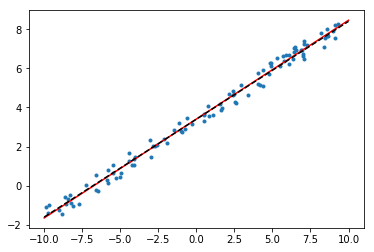

In [49]:
# python program to perform a 1-D linear inversion
import numpy as np
import matplotlib.pyplot as plt

# defining the true relation and noise level
c1 = 0.5; c0 = 3.4;
noise_level = 1
true_fun = lambda x: c1*x+c0

# generate the data
x = (np.random.rand(100)-0.5)*20
y = true_fun(x)
y += noise_level*(np.random.rand(100)-0.5) # add noise to data

# perform least-square fitting
A = np.hstack((x.reshape(-1,1),np.ones(len(x)).reshape(-1,1)))
A_dagger = A.T.dot(A)
para = np.linalg.inv(A_dagger).dot(A.T.dot(y))

# print out the result
print('True answer: c_1:{},c_0:{}'.format(c1,c0))
print('Inverted answer: c_1:{:.2f},c_0:{:.2f}'.format(para[0],para[1]))


predict_x = np.array([-10,10])
predict_y = para[0]*predict_x+para[1]

plt.figure()
plt.plot(x,y,'.')
plt.plot(predict_x,predict_y,'r')
plt.plot(predict_x,true_fun(predict_x),'k--')
plt.show()

## 1-D Polynomial Curve Fitting
It makes sense that we can use linear least square method to solve a linear function problem, but what if the variables $\alpha$ and $\beta$ are not related linearly, but through a $m^{th}$-order polynomial function?
$$
\beta = c_m \alpha^m + c_{m-1} \alpha^{m-1} + ... + c_1 \alpha + c_0
$$
It turns out that we can use the exact same setting as the linear equation, by forming matrix and vectors:
$$
A = 
\left[ \begin{matrix}
\alpha_1^m & \alpha_1^{m-1} & ... & \alpha_1 & 1 \\
\alpha_2^m & \alpha_2^{m-1} & ... & \alpha_2 & 1 \\
\vdots & \vdots & ... & \vdots & \vdots \\
\alpha_n^m & \alpha_n^{m-1} & ... & \alpha_n & 1 \\
\end{matrix} \right], \ \ \ \ \ 
x = 
\left[ \begin{matrix}
c_m \\ c_{m-1} \\ \vdots \\ c_0
\end{matrix} \right], \ \ \ \ \ 
b = 
\left[ \begin{matrix}
\beta_m \\ \beta_{m-1} \\ \vdots \\ \beta_0
\end{matrix} \right], \ \ \ \ \ 
$$
same as above, the coefficients $c_0,c_1,...,c_m$ can be solved by:
$$
\left[ \begin{matrix}
c_m \\ c_{m-1} \\ ... \\ c_0
\end{matrix} \right]
= \left(A^TA\right)^{-1}A^T b
$$

In [ ]:
# python program to perform a 1-D linear inversion
import numpy as np
import matplotlib.pyplot as plt

# defining the true relation and noise level
c = [1,2,3,4,5]
noise_level = 1
true_fun = lambda x: np.polyval(c,x)

# generate the data
x = (np.random.rand(100)-0.5)*2
y = true_fun(x)
y += noise_level*(np.random.rand(100)-0.5) # add noise to data

# perform least-square fitting
A = np.ones((len(x))).reshape(-1,1)
for i in range(1,len(c)):
    A = np.hstack((x.reshape(-1,1)**i,A))
A_dagger = A.T.dot(A)
para = np.linalg.inv(A_dagger).dot(A.T.dot(y))

# print out the result
print('True answer: ',c)
print('Inverted answer: ',para)

predict_x = np.linspace(-1,1,100)
predict_y = np.polyval(c,predict_x)

plt.figure()
plt.plot(x,y,'x')
plt.plot(predict_x,predict_y,'r')
plt.plot(predict_x,true_fun(predict_x),'k--')
plt.show()

## 2-D Polynomial Surface Fitting

The same idea applies to higher dimension problems. Say variable $\gamma$ is depended on variables $\alpha$ and $\beta$ through a 2-D 2nd-order polynomial function
$$
\gamma = c_0 + c_1\alpha + c_2 \alpha^2 + c_3 \alpha \beta + c_4 \beta + c_5 \beta^2 
$$
we can again form the linear equation set $Ax$ with
$$
A = 
\left[ \begin{matrix}
\beta_1^2 & \beta_1 & \alpha_1\beta_1 &\alpha_1^2 &\alpha_1 & 1 \\
\beta_2^2 & \beta_2 & \alpha_2\beta_2 &\alpha_2^2 &\alpha_2 & 1 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
\beta_n^2 & \beta_n & \alpha_n\beta_n &\alpha_n^2 &\alpha_n & 1
\end{matrix} \right], \ \ \ \ \ \ 
x = 
\left[ \begin{matrix}
c_5 \\ c_4 \\ c_3 \\ c_2 \\ c_1 \\ c_0  
\end{matrix} \right] 
$$
and solve it using least square method.

## Weighted Least Square Method

One of the problem for least square inversion is that it is very sensitive to outliers or measurements with large error, due to the nature of $L_2$ norm. 

One way to reduce the impact of bad data is to give them less weight in the error function. 
Because the actual problem we solve for least square problems is to minimize $||Ax-b||_2$, the elementary operations of linear equation set do not apply any more (except for the interchange rule). By multiplying one row of $A$ and $b$ at the same time, we change the ratio of the prediction error of the measurement in the total error. This gives us the opportunity to apply different weights to the measurements with different accuracy.

Multiple each row with a different weight $w_i$, the error $e$ can be written as
$$
e = WAx - Wb = A'x - b'
$$
where $A' = WA$, $b' = Wb$, and $W$ is a diagonal matrix with $W_{ii} = w_i$.

Replacing $A'$ and $b'$ in the normal equations we have
$$
(WA)^T(WA)x = (WA)^TWb \\
A^T W^T W A x = A^T W^T W b \\
A^T W' A x = A^T W' b
$$
where $W' = W^TW$, which is also a diagonal matrix with $W'_{ii} = w_i^2$.

True answer: c_1:0.5,c_0:3.4
Inverted answer: c_1:0.31,c_0:4.16


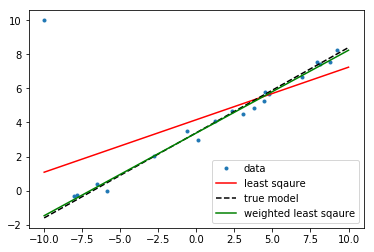

In [25]:
# demonstration of effect of outlier to least sqaure inversion
import numpy as np
import matplotlib.pyplot as plt

# defining the true relation and noise level
c1 = 0.5; c0 = 3.4;
noise_level = 1
true_fun = lambda x: c1*x+c0

# generate the data
data_number = 20
x = (np.random.rand(data_number)-0.5)*20
y = true_fun(x)
y += noise_level*(np.random.rand(data_number)-0.5) # add noise to data

# add an outlier
y[10] = 10
x[10] = -10

# perform normal least-square fitting
A = np.hstack((x.reshape(-1,1),np.ones(len(x)).reshape(-1,1)))
A_dagger = A.T.dot(A)
para = np.linalg.inv(A_dagger).dot(A.T.dot(y))

# perform weighted least-square fitting
w = np.ones(data_number)
w[10] = 0.1 # change the weight of the outlier
W = np.diag(w**2)
A_dagger = A.T.dot(W).dot(A)
para_w = np.linalg.inv(A_dagger).dot(A.T.dot(W).dot(y))

# print out the result
print('True answer: c_1:{},c_0:{}'.format(c1,c0))
print('Inverted answer: c_1:{:.2f},c_0:{:.2f}'.format(para[0],para[1]))

predict_x = np.array([-10,10])
predict_y = para[0]*predict_x+para[1]
predict_y_w = para_w[0]*predict_x+para_w[1]

plt.figure()
plt.plot(x,y,'.',label='data')
plt.plot(predict_x,predict_y,'r',label = 'least sqaure')
plt.plot(predict_x,true_fun(predict_x),'k--', label='true model')
plt.plot(predict_x,predict_y_w,'g',label = 'weighted least sqaure')
plt.legend()
plt.show()

### Weight Selection

Ideally the weight $w_i$ of each measurement should be its standard deviation. For example, if the measurements are carried out by two different instruments, with one being less than accurate the other, we should weight the two kinds of measurements differently based on their instrument precision (standard deviation). 

In the real situation many outliers are due to data error or instrument instability, of which the standard deviation is difficult to estimate. In this case we can solve the problem iteratively:

1. Perform a regular least-square inversion. 
2. Calculate the error of each measurement.
3. Weight each measurement (row) based on the prediction error.
4. Perform weighted least-square inversion.

Step 2-4 should be repeated several times until the inversion result is stabilized. 

## Regularization

Although we usually have much more measurements (number of rows of $A$) than unknowns (number of columns of $A$), this does not guarantee that we always have an unique solution. In another word, the matrix $A^\dagger = A^TA$ is not guaranteed to be full rank. In this case, we can add some constraint on the unknowns to make the regression stable.